In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay[["Time", "O3", "O3_flag"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3453 non-null   datetime64[ns]
 1   O3       1895 non-null   float64       
 2   O3_flag  3368 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 81.1+ KB


In [6]:
dfDay[["Time", "O3", "O3_flag"]].describe()

,Time,O3
count,3453,1895.000000
mean,2020-04-23 03:36:26.272806400,33.354013
min,2015-08-01 00:00:00,-267.601807
25%,2017-12-11 00:00:00,26.668128
50%,2020-04-22 00:00:00,32.956792
75%,2022-09-02 00:00:00,39.665399
max,2025-01-27 00:00:00,181.718000
std,NaN,13.421609


In [7]:
def clean(x):
    if x >= 0.03 and x <= 500: return x
    return np.nan

In [8]:
dfDay["O3"] = dfDay["O3"].apply(clean)

In [9]:
dfDay["O3"].describe()

count    1892.000000
mean       33.621843
std        10.929299
min         7.261363
25%        26.705450
50%        32.960229
75%        39.696266
max       181.718000
Name: O3, dtype: float64

In [10]:
dfDay["O3"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: O3
Non-Null Count  Dtype  
--------------  -----  
1892 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


In [11]:
dfDay.loc[dfDay["O3_flag"] != "OK", "O3"] = np.nan

In [12]:
dfDay[dfDay["O3_flag"] != "OK"]["O3"].info()

<class 'pandas.core.series.Series'>
Index: 1571 entries, 0 to 3452
Series name: O3
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 24.5 KB


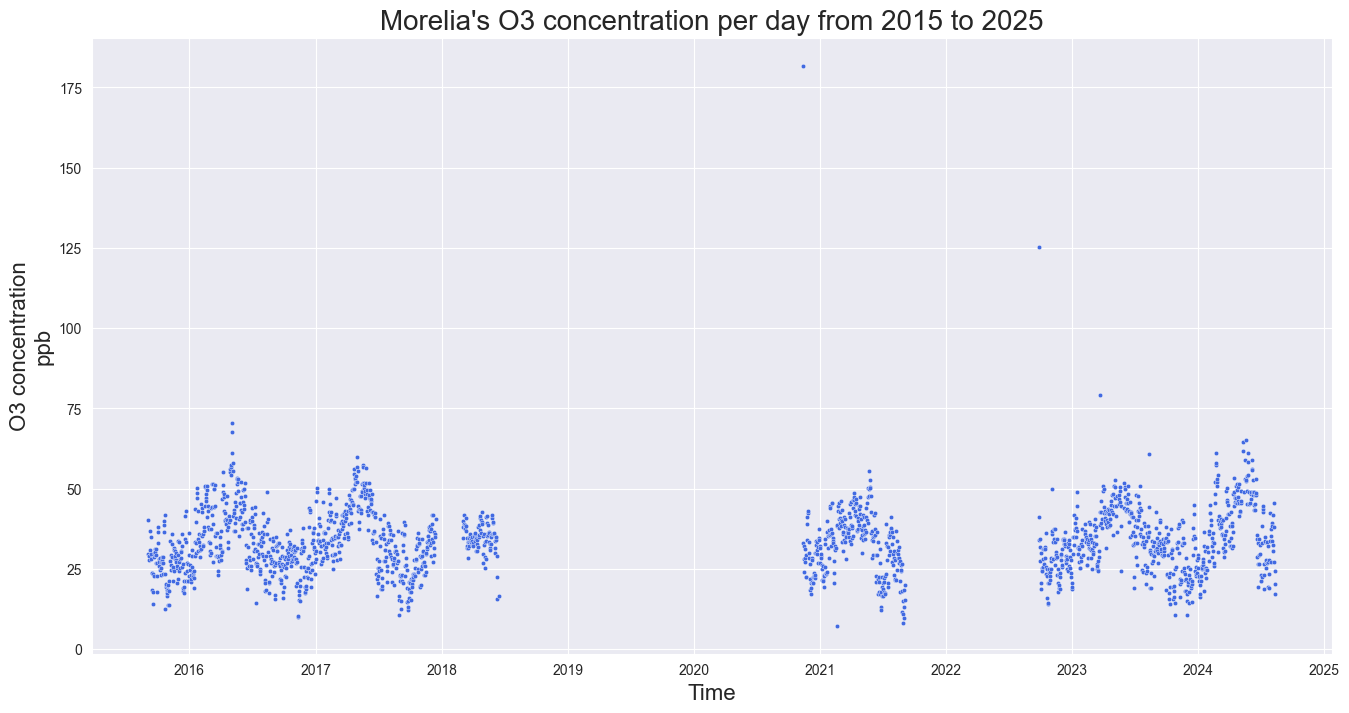

In [18]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["O3"], s=10, color="royalblue")
# plt.ylim(0, 100)
plt.ylabel("O3 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's O3 concentration per day from 2015 to 2025", size=20)
plt.show()